In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma, norm

from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema
plt.ion()
plt.show()

np.random.seed(1)

In [14]:
size_data = 100
    
parameters = np.array([[-5, 1],
                       [0,  1],
                        [-1,  1]])
weights = np.array([0.3, 0.3, 0.4])
    
mixture = np.random.choice(len(weights), size = size_data, replace=True, p = weights)
data = np.array([norm.rvs(*(parameters[j])) for j in mixture])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


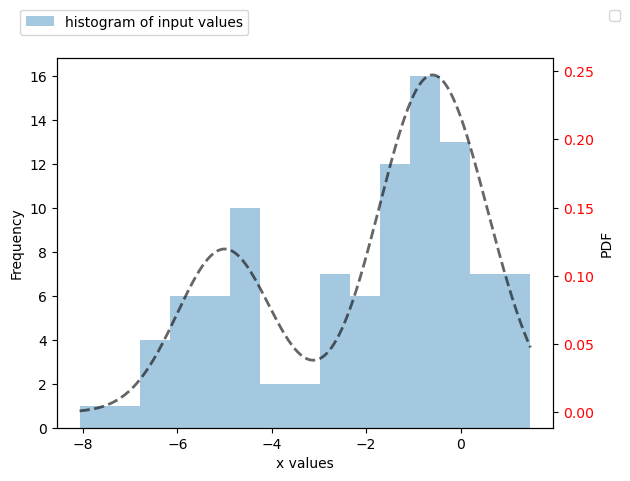

In [15]:
def plotHistogramAndPdf(data):
    x = np.linspace(np.min(data),np.max(data), len(data)-1)
    ax = plt.gca()
    plt.hist(data, bins = 15, alpha = 0.4, label = 'histogram of input values');
    plt.ylabel('Frequency')
    plt.xlabel('x values')
    ax2 = ax.twinx()
    #plt.plot(x, pdf, c = 'red', label = 'probability density function');
    plt.ylabel('PDF')
    [tl.set_color('r') for tl in ax2.get_yticklabels()]
    ax.legend(bbox_to_anchor=(0.4, 1.15))
    ax2.legend(bbox_to_anchor=(1.15,1.15))
    plt.savefig('figures/hist.jpg', bbox_inches='tight')

x = np.linspace(np.min(data),np.max(data), 1000)
f = np.zeros_like(x)
for (l, s), w in zip(parameters , weights):
    f += norm.pdf(x, loc=l, scale=s) * w

plotHistogramAndPdf(data)
plt.plot(x, f,  'k--', lw=2, alpha=0.6, label='Densité réelle')

# Kernel density estimations



x:  -7.982416143819149e+00  | y:  0.010676421575898164
x:  -4.790784194869894  | y:  0.12808465848161904
x:  -0.6435738180915207  | y:  0.2321480885764468
[  9 343 777]


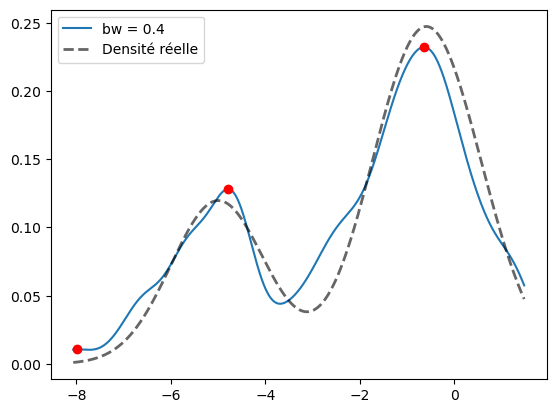

In [16]:
def GaussianKernel(u):
    return np.exp(-0.5*u**2)/(np.sqrt(2*np.pi))
def RosenblattKernel(u):
    if (-1<= u <= 1):
        return 0.5
    else:
        return 0

def KernelEstimator(u, data, h, kernel):
    N = len(data)
    value = 0
    for k in range(N):
        value = value + kernel((u-data[k])/h)
    return value/(N * h)

# for local maxima

for h in [0.4]:
    y = np.array([KernelEstimator(i, data, h, GaussianKernel) for i in x])
    local_max = argrelextrema(y, np.greater)
    plt.plot(x, y, label='bw = '+str(h))
    plt.plot([x[i] for i in local_max], [y[i] for i in local_max], 'ro')
    plt.plot(x, f,  'k--', lw=2, alpha=0.6, label='Densité réelle')
plt.legend(loc='best')

for i in local_max[0]:
    print('x: ', x[i], ' | y: ', y[i]) 
    
print(local_max[0])
    


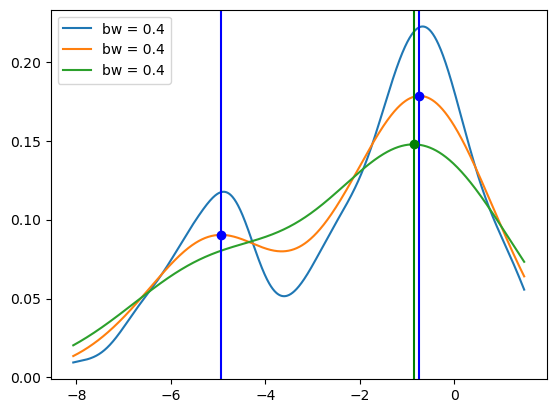

In [17]:

y1 = np.array([KernelEstimator(i, data, 0.5, GaussianKernel) for i in x])
local_max1 = argrelextrema(y1, np.greater)

y2 = np.array([KernelEstimator(i, data, 1, GaussianKernel) for i in x])
local_max2 = argrelextrema(y2, np.greater)

y3 = np.array([KernelEstimator(i, data, 1.5, GaussianKernel) for i in x])
local_max3 = argrelextrema(y3, np.greater)

plt.plot(x, y1, label='bw = '+str(h))
plt.plot(x, y2, label='bw = '+str(h))
plt.plot(x, y3, label='bw = '+str(h))

#plt.plot([x[i] for i in local_max1], [y1[i] for i in local_max1], 'ro')
#for i in local_max1[0]:
#    plt.axvline(x[i], color='red')
plt.plot([x[i] for i in local_max2], [y2[i] for i in local_max2], 'bo')
for i in local_max2[0]:
    plt.axvline(x[i], color='blue')
plt.plot([x[i] for i in local_max3], [y3[i] for i in local_max3], 'go')
for i in local_max3[0]:
    plt.axvline(x[i], color='green')

plt.legend(loc='best')

# Find the critical $h_*$

In [18]:
def critical_value(hmax, num_mode):
    hmin_test=0
    hmax_test=hmax
    for iter in range(20):
        h_test = 0.5*(hmin_test+hmax_test)
        y = np.array([KernelEstimator(i, data, h_test, GaussianKernel) for i in x])
        local_max = argrelextrema(y, np.greater)
        if len(local_max[0])<= num_mode:
            hmax_test = h_test
            print(iter, len(local_max[0]), hmin_test, hmax_test)
        else:
            hmin_test = h_test
            print(iter, len(local_max[0]), hmin_test, hmax_test)
    return hmin_test

hcrit1 = critical_value(10, 1)
hcrit2 = critical_value(10, 2)
hcrit3 = critical_value(10, 3)
hcrit4 = critical_value(10, 4)

hcritALL = [hcrit1, hcrit2, hcrit3, hcrit4]
print(hcritALL)

0 1 0 5.0
1 1 0 2.5
2 1 0 1.25
3 2 0.625 1.25
4 2 0.9375 1.25
5 2 1.09375 1.25
6 2 1.171875 1.25
7 2 1.2109375 1.25
8 2 1.23046875 1.25
9 1 1.23046875 1.240234375
10 1 1.23046875 1.2353515625
11 1 1.23046875 1.23291015625
12 1 1.23046875 1.231689453125
13 2 1.2310791015625 1.231689453125
14 2 1.23138427734375 1.231689453125
15 1 1.23138427734375 1.231536865234375
16 2 1.2314605712890625 1.231536865234375
17 2 1.2314987182617188 1.231536865234375
18 2 1.2315177917480469 1.231536865234375
19 2 1.231527328491211 1.231536865234375
0 1 0 5.0
1 1 0 2.5
2 1 0 1.25
3 2 0 0.625
4 5 0.3125 0.625
5 2 0.3125 0.46875
6 3 0.390625 0.46875
7 2 0.390625 0.4296875
8 3 0.41015625 0.4296875
9 2 0.41015625 0.419921875
10 3 0.4150390625 0.419921875
11 3 0.41748046875 0.419921875
12 2 0.41748046875 0.418701171875
13 3 0.4180908203125 0.418701171875
14 2 0.4180908203125 0.41839599609375
15 3 0.418243408203125 0.41839599609375
16 3 0.4183197021484375 0.41839599609375
17 2 0.4183197021484375 0.4183578491210937

hcrit 1.231527328491211
x:  -4.351218118068499e+00  | y:  0.08536234532035854
x:  -0.7773547979875968  | y:  0.16271514702915968


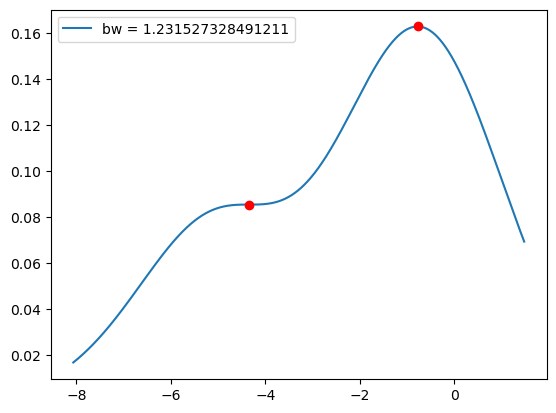

In [19]:
hcrit = hcritALL[0]
h = hcrit
print('hcrit', h)

y = np.array([KernelEstimator(i, data, h, GaussianKernel) for i in x])
local_max = argrelextrema(y, np.greater)
plt.plot(x, y, label='bw = '+str(h))
plt.plot([x[i] for i in local_max], [y[i] for i in local_max], 'ro')
plt.legend(loc='best')

for i in local_max[0]:
    print('x: ', x[i], ' | y: ', y[i]) 
            

x:  -7.773547979875968e-01  | y:  0.16270891790431788


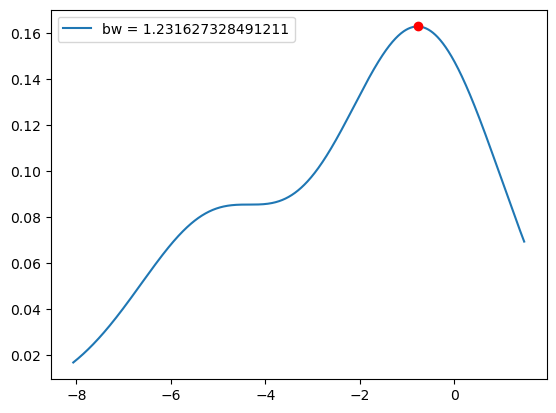

In [20]:
h = hcrit+0.0001
y = np.array([KernelEstimator(i, data, h, GaussianKernel) for i in x])
local_max = argrelextrema(y, np.greater)
plt.plot(x, y, label='bw = '+str(h))
plt.plot([x[i] for i in local_max], [y[i] for i in local_max], 'ro')
plt.legend(loc='best')

for i in local_max[0]:
    print('x: ', x[i], ' | y: ', y[i]) 

# Find the good h.

In [21]:
sizeData = len(data)
sig = np.std(data)
hcrit = hcritALL[1]

new_ind = np.random.randint(sizeData, size=sizeData) 
new_sample = np.array([data[i] for i in new_ind])

new_sam = new_sample + hcrit * norm.rvs(0,1, sizeData)
new_sam = new_sam / np.sqrt(1+hcrit**2 / sig**2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


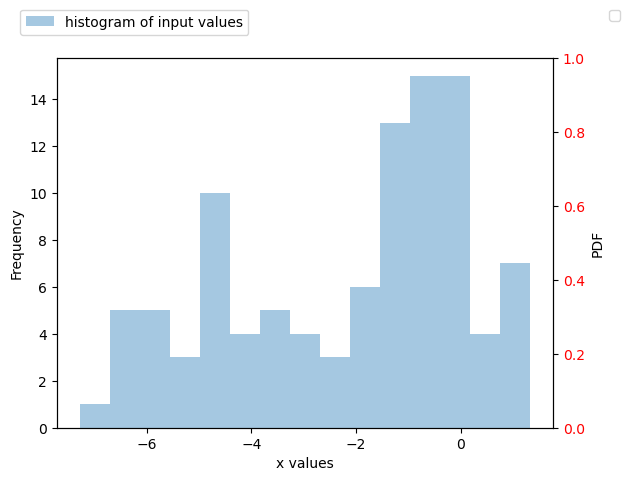

In [22]:
plotHistogramAndPdf(new_sam)

x:  -4.666558999252109e+00  | y:  0.08518053073690866
x:  -3.3765281216827985  | y:  0.0904456043746232
x:  -0.471569701082279  | y:  0.16027480547460476


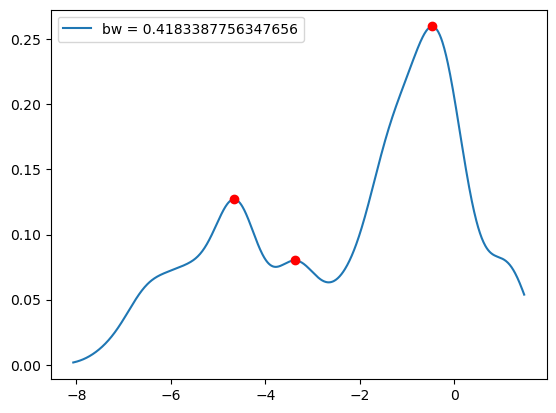

In [23]:
ybis = np.array([KernelEstimator(i, new_sam, hcrit, GaussianKernel) for i in x])
local_maxbis = argrelextrema(ybis, np.greater)
plt.plot(x, ybis, label='bw = '+str(hcrit))
plt.plot([x[i] for i in local_maxbis], [ybis[i] for i in local_maxbis], 'ro')
plt.legend(loc='best')

for i in local_maxbis[0]:
    print('x: ', x[i], ' | y: ', y[i]) 

# Iterative Methods

In [24]:
sizeData = len(data)
sig = np.std(data)
N = 100

for idx,hcrit in enumerate(hcritALL):
    num_ok = 0
    for iter in range(N):
        new_ind = np.random.randint(sizeData, size=sizeData) 
        new_sample = np.array([data[i] for i in new_ind])

        new_sam = new_sample + hcrit * norm.rvs(0,1, sizeData)
        new_sam = new_sam / np.sqrt(1+hcrit**2 / sig**2)

        ybis = np.array([KernelEstimator(i, new_sam, hcrit, GaussianKernel) for i in x])
        local_maxbis = argrelextrema(ybis, np.greater)
        if len(local_maxbis[0]) <= idx+1:
            num_ok = num_ok + 1
        
    print('Reject', idx+1,'mode | p-value', num_ok/N, ' | bw', hcrit)

Reject 1 mode | p-value 0.96  | bw 1.231527328491211
Reject 2 mode | p-value 0.3  | bw 0.4183387756347656
Reject 3 mode | p-value 0.35  | bw 0.33130645751953125
Reject 4 mode | p-value 0.51  | bw 0.3203105926513672


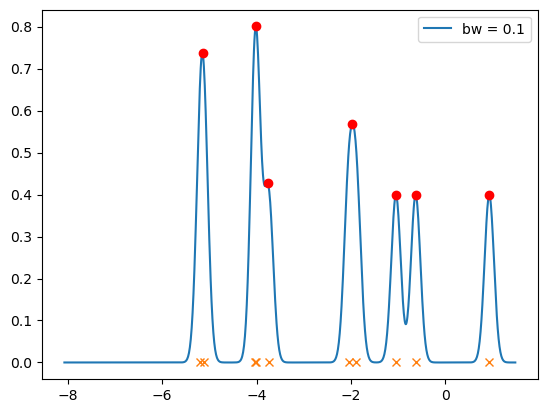

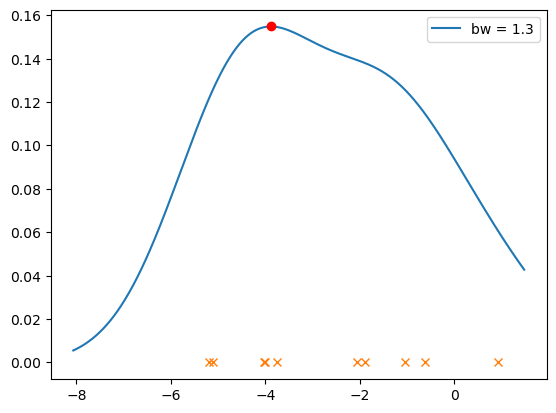

x:  -3.8829846884322317e+00  | y:  0.15484024854998651
[438]


In [25]:
def GaussianKernel(u):
    return np.exp(-0.5*u**2)/(np.sqrt(2*np.pi))
def RosenblattKernel(u):
    if (-1<= u <= 1):
        return 0.5
    else:
        return 0

def KernelEstimator(u, data, h, kernel):
    N = len(data)
    value = 0
    for k in range(N):
        value = value + kernel((u-data[k])/h)
    return value/(N * h)

# for local maxima

size_data = 10
    
parameters = np.array([[-5, 1],
                       [0,  1],
                        [-1,  1]])
weights = np.array([0.6, 0, 0.4])
    
mixture = np.random.choice(len(weights), size = size_data, replace=True, p = weights)
data = np.array([norm.rvs(*(parameters[j])) for j in mixture])

for h in [0.1]:
    y = np.array([KernelEstimator(i, data, h, GaussianKernel) for i in x])
    local_max = argrelextrema(y, np.greater)
    plt.plot(x, y, label='bw = '+str(h))
    plt.plot([x[i] for i in local_max], [y[i] for i in local_max], 'ro')
    #plt.plot(x, f,  'k--', lw=2, alpha=0.6, label='Densité réelle')
    plt.plot(data, 0*data, 'x')
plt.legend(loc='best')
plt.show()

for h in [1.3]:
    y = np.array([KernelEstimator(i, data, h, GaussianKernel) for i in x])
    local_max = argrelextrema(y, np.greater)
    plt.plot(x, y, label='bw = '+str(h))
    plt.plot([x[i] for i in local_max], [y[i] for i in local_max], 'ro')
    #plt.plot(x, f,  'k--', lw=2, alpha=0.6, label='Densité réelle')
    plt.plot(data, 0*data, 'x')
plt.legend(loc='best')
plt.show()

for i in local_max[0]:
    print('x: ', x[i], ' | y: ', y[i]) 
    
print(local_max[0])